In [13]:
import pandas as pd

In [14]:
import matplotlib.pyplot as plt

In [15]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif' #解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

1、	读入”area-gdp.csv”文件

In [16]:
area_gdp = pd.read_csv('./area-gdp.csv')

In [17]:
area_gdp

,AREA,YEAR,GDP
0,DB,2010,37493.45
1,HB,2010,64605.16
2,HD,2010,162031.40
3,HN,2010,57647.41
4,HZ,2010,55097.93
5,XB,2010,22721.78
6,XN,2010,37444.86
7,DB,2011,45377.53
8,HB,2011,77672.40
9,HD,2011,190550.31


2、	通过饼图展示2017年我国七大行政区域（东北DB、华北HB、华东HD、华南HN、华中HZ、西北XB、西南XN）的国内生产总值GDP占比情况。（突出东北地区占比情况）

In [18]:
gdp_2017 = area_gdp.loc[(area_gdp['YEAR']==2017)]

([<matplotlib.patches.Wedge at 0x7f5eba370760>,
 [Text(1.1757909608004504, 0.23982413660837779, 'DB'),
  Text(0.7516282351284511, 0.8031531585928615, 'HB'),
  Text(-0.8271065145649737, 0.7251860544468441, 'HD'),
  Text(-0.6964476357458762, -0.8514462347464927, 'HN'),
  Text(0.16963956278061365, -1.0868405673048842, 'HZ'),
  Text(0.7490712340592441, -0.8055385070280385, 'XB'),
  Text(1.0424212140130684, -0.3512235934209447, 'XN')])

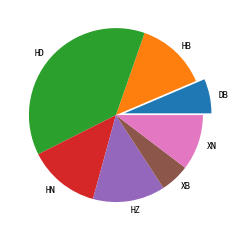

In [19]:
plt.pie(x = gdp_2017['GDP'],labels = gdp_2017['AREA'],explode = [0.1,0,0,0,0,0,0])

3、	读入”area-gdp.csv”文件

In [120]:
province_gdp = pd.read_csv('./province-gdp.csv', encoding = 'gb2312') 

In [121]:
province_gdp

,AREA,PROVINCE,YEAR,GDP
0,HN,广东,2017,89705.23
1,HD,江苏,2017,85869.76
2,HD,山东,2017,72634.15
3,HD,浙江,2017,51768.26
4,HZ,河南,2017,44552.83
5,XN,四川,2017,36980.22
6,HZ,湖北,2017,35478.09
7,HB,河北,2017,34016.32
8,HZ,湖南,2017,33902.96
9,HD,福建,2017,32182.09


4、	通过柱状图展示2017年各省GDP的比较情况（按GDP从大到小的顺序）

In [56]:
gdp_pro_2017 = province_gdp.sort_values(by = 'GDP', ascending = False) 

<BarContainer object of 31 artists>

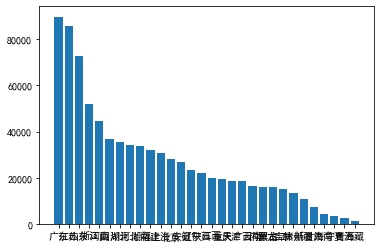

In [57]:
plt.bar(gdp_pro_2017['PROVINCE'], height = gdp_pro_2017['GDP'])

5、	利用2017年省级GDP数据将各省GDP绘制在全国地图中。

In [58]:
from pyecharts.globals import ThemeType
from pyecharts import options as opts
from pyecharts.charts import Map

In [59]:
gdpmap = (
    Map(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add("2017年中国各省GDP",province_gdp[["PROVINCE","GDP"]].values.tolist(), "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="2017年中国各省GDP",pos_bottom = "90%", pos_right = "20%"),
        visualmap_opts=opts.VisualMapOpts(type_= "color",max_=110000, range_text = ['GDP总量（亿）颜色区间:', ''],is_piecewise=1,pos_top= "middle",pos_left="left",orient="vertical",split_number=10),
    )
) 
gdpmap.render_notebook()

6、	画出能够同时展示各区域GDP占比与每个区域内各省GDP占比的旭日图

In [66]:
data = province_gdp.groupby('AREA')['GDP'].sum()

In [67]:
data

AREA
DB     54256.45
HB    112205.08
HD    320111.56
HN    112691.03
HZ    113933.88
XB     46309.06
XN     87633.04
Name: GDP, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

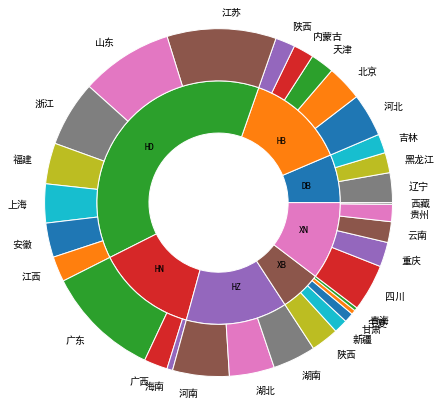

In [105]:
provice = [] 
gdp = []
for i in data.index:
    df = province_gdp[province_gdp['AREA'] == i] 
    provice = provice + df['PROVINCE'].tolist() 
    gdp = gdp + df['GDP'].tolist() 
#     print(df_t)
size = 0.6
plt.pie(data.values, labels = data.index, radius = 2-size, wedgeprops=dict(width=size,edgecolor='w'),labeldistance=0.7)
plt.pie(gdp, labels = provice, radius = 2, wedgeprops=dict(width=size,edgecolor='w'),labeldistance=1.1)
plt.show

7、	画出展示各省GDP的分布情况的直方图与密度图

In [108]:
import seaborn as sns  

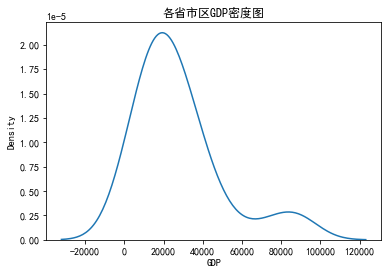

In [125]:
sns.kdeplot(province_gdp['GDP']) 
plt.title('各省市区GDP密度图')
plt.show()

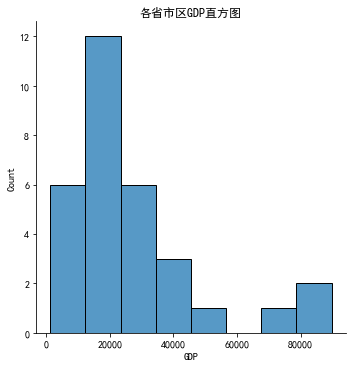

In [126]:
sns.displot(province_gdp['GDP']) 
plt.title('各省市区GDP直方图')
plt.show()